Weights: [0.29618632758100794, -0.6444705062784257, 0.5590385817078098]

Truth Table for AND:
 [[1 1 1]
 [1 0 0]
 [0 1 0]
 [0 0 0]]

Iterations: 174

[ 0.0007544  -0.12828418 -0.00477509 -0.13381367]
Finalized Weights: [-0.13381367  0.00552949  0.12903858]

x1,y1: [-1, 1.0798566157220384]  | x2,y2  [1, 0.9941536631881134]


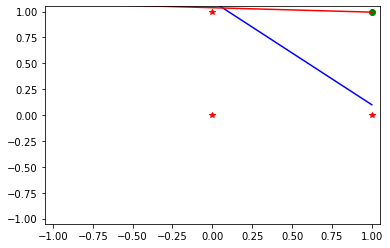

In [1815]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

def initialize_weights():
    # Initialize Weights
    w = []

    for i in range(3):
        w.append(random.random()*2 - 1)
        
    return w

def visualize_guess(w,finished):

    #Data to Classify
    if finished:
        color = "r"
    else:
        color = (random.random(), random.random(), random.random())
    plt.axis([-1.05, 1.05, -1.05, 1.05])
    plt.plot(0, 0, 'r*')
    plt.plot(1, 0, 'r*')
    plt.plot(0, 1, 'r*')
    plt.plot(1, 1, 'go')

    # Target Decision Line
    # w0 < 0
    # w1 < -w0
    # w2 < -w0
    # w1 + w2 >= -w0
    
    px1 = -1
    m = -1/1 # -w1/w2
    b = 1.1/1 # -w0/w2
    py1 = m*px1 + b
    px2 = 1
    py2 = m*px2 + b

    plt.plot([px1, px2], [py1, py2], 'b')


    # Guess
    m = -w[1]/w[2]
    b = -w[0]/w[2]
    py1 = m*px1 + b
    px2 = 1
    py2 = m*px2 + b

    plt.plot([px1, px2], [py1, py2], color)
    if finished:
        print("x1,y1: {}  | x2,y2  {}".format([px1, py1], [px2, py2]))
    

def truth_table(y):

    #Truth Table

    x0 = np.array([(1, 1, 1, 1)])
    x1 = np.array([(1, 1, 0, 0)])
    x2 = np.array([(1, 0, 1, 0)])
    y = np.array([(y)])
    truth = np.concatenate((x1.T, x2.T, y.T), axis = 1)
    print("Truth Table for AND:\n {}\n".format(truth))
    return [x0, x1, x2]

def activation_function(w, x0, x1, x2):
    # Weight Check to Truth Table

    x = np.concatenate((x0.T, x1.T, x2.T),axis = 1)
    g = np.inner(np.array(w),x)
  
    return [x, g]

def alter_weights(learning_rate,w,x, index, sign):

    learning_array = np.multiply(x,learning_rate)
    
    if sign >= 0:
        w = np.add(np.array(w),learning_array[index])
    elif sign < 0:
        w = np.subtract(np.array(w),learning_array[index])
    return w
    
def find_mismatch(y, logic_array_target, logic_array_guess,random_guess):
    temporary_array = list(range(len(logic_array_guess)))
    
    for i in range(len(logic_array_guess)):

        if random_guess == True:
            selected_index = random.choice(temporary_array)
        else:
            selected_index = i

        if logic_array_guess[selected_index] != logic_array_target[selected_index]:
            
            return [selected_index, logic_array_target[selected_index]]
        
        if len(temporary_array) > 0:
            temporary_array.remove(selected_index)
        
    
def pocket_algorithm(w, g, logic_array_target, learning_rate, x, x_list, y, time):
    count = 0
    pocket_w = w
    random_guess = False
    count_error = 1
    logic_array_guess = None
    while logic_array_guess != logic_array_target:
        
        count += 1
        logic_array_guess = []
        logic_array_guess = list(map(lambda x: np.sign(x), g))
        
        if (logic_array_guess == logic_array_target):
            break
        
        temp = find_mismatch(y, logic_array_target, logic_array_guess, random_guess)
            
        if temp == None:
            continue
                
        truth_table_index = temp[0]
        sign = temp[1]
        pocket_w = alter_weights(learning_rate, pocket_w, x, truth_table_index, sign)
        g = activation_function(pocket_w, x_list[0], x_list[1], x_list[2])[1]
        
        if count >= 1000:
            print("Took too long.\n")
            break
        
        
    print("Iterations: {}\n".format(count))   
    print(g)
    return pocket_w






# Execution Code Begins Here

learning_rate = 0.01
logic_array_target = [1, -1, -1, -1]
output = [1, 0, 0, 0]
w = initialize_weights()

print("Weights: {}\n".format(w))

x_list = truth_table(output)
[x, g] = activation_function(w, x_list[0], x_list[1], x_list[2])
w = pocket_algorithm(w, g, logic_array_target, learning_rate, x, x_list, output, time)

print("Finalized Weights: {}\n".format(w))

visualize_guess(w,True)
plt.show()